
# EKG ML Model - Marissa Project Work

Loyola University Chicago

COMP 379-001/479-001,
Spring 2025,
Machine Learning
Instructor: Daniel Moreira (dmoreira1@luc.edu)

Language: Python 3

Needed libraries:

* NumPy (https://numpy.org/)
* Pandas (https://pandas.pydata.org/)
* Scikit-learn (https://scikit-learn.org/)
* matplotlib (https://matplotlib.org/)

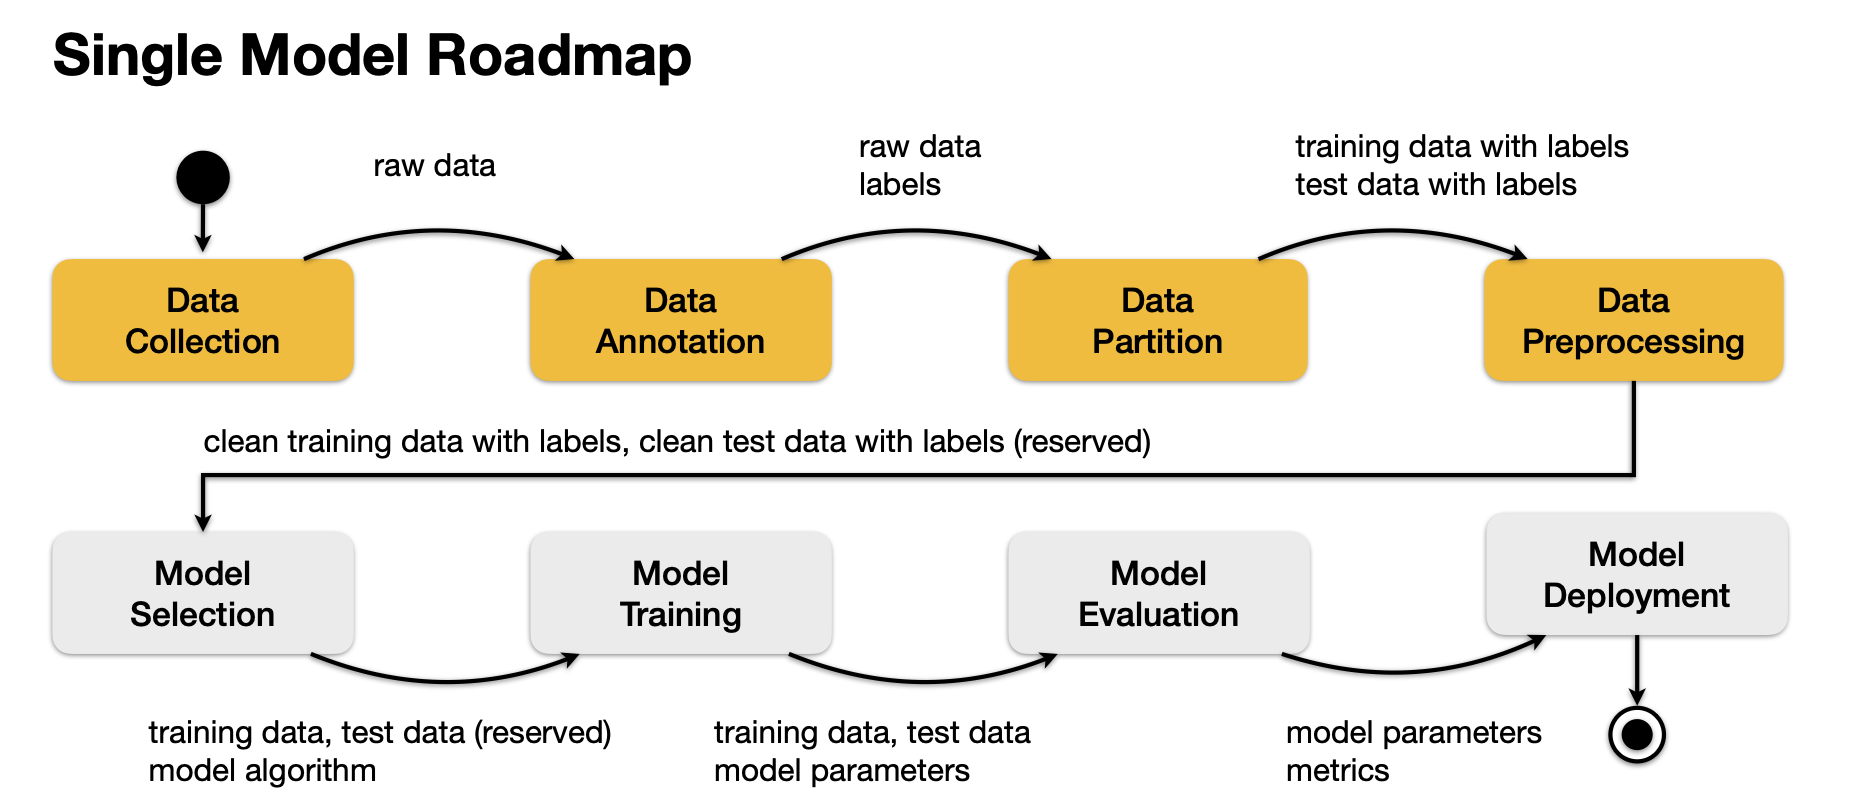

### Data Partition

#### Set up

- Dataset columns according to documentation
- The shape, how unique the contents are, etc. = helpful

In [169]:
# Importing Libraries

import numpy as np
print('NumPy version', np.__version__)

import pandas as pd
print('Pandas version', pd.__version__)

import matplotlib
print('Matplotlib version', matplotlib.__version__)

import sklearn
print('SciKit version', sklearn.__version__)

NumPy version 2.0.2
Pandas version 2.2.2
Matplotlib version 3.10.0
SciKit version 1.6.1


In [170]:
# loads the wine dataset into memory
df_diagnostics = pd.read_csv('/content/Diagnostics.csv')

# adds headers to the dataset according to documentation
df_diagnostics.columns = [
    'FileName', 'Rhythm', 'Beat', 'PatientAge', 'Gender', 'VentricularRate',
    'AtrialRate', 'QRSDuration', 'QTInterval', 'QTCorrected',
    'RAxis', 'TAxis', 'QRSCount', 'QOnset','QOffset','TOffset']

# prints info
print('Data shape:', df_diagnostics.shape)
print('Labels, Label count:', np.unique(df_diagnostics['FileName'], return_counts=True))
print()

# first 10 samples
df_diagnostics.head(10)

Data shape: (10646, 16)
Labels, Label count: (array(['MUSE_20180111_155115_19000', 'MUSE_20180111_155154_74000',
       'MUSE_20180111_155203_15000', ..., 'MUSE_20181222_204310_31000',
       'MUSE_20181222_204312_58000', 'MUSE_20181222_204314_78000'],
      dtype=object), array([1, 1, 1, ..., 1, 1, 1]))



,FileName,Rhythm,Beat,PatientAge,Gender,VentricularRate,AtrialRate,QRSDuration,QTInterval,QTCorrected,RAxis,TAxis,QRSCount,QOnset,QOffset,TOffset
0,MUSE_20180113_171327_27000,AFIB,RBBB TWC,85,MALE,117,234,114,356,496,81,-27,19,208,265,386
1,MUSE_20180112_073319_29000,SB,TWC,59,FEMALE,52,52,92,432,401,76,42,8,215,261,431
2,MUSE_20180111_165520_97000,SA,NONE,20,FEMALE,67,67,82,382,403,88,20,11,224,265,415
3,MUSE_20180113_121940_44000,SB,NONE,66,MALE,53,53,96,456,427,34,3,9,219,267,447
4,MUSE_20180112_122850_57000,AF,STDD STTC,73,FEMALE,162,162,114,252,413,68,-40,26,228,285,354
5,MUSE_20180112_120347_79000,SB,NONE,46,FEMALE,57,57,70,404,393,38,24,9,225,260,427
6,MUSE_20180114_075026_69000,AFIB,TWC,80,FEMALE,98,86,74,360,459,69,83,17,215,252,395
7,MUSE_20180209_172046_21000,SR,NONE,46,MALE,63,63,90,376,384,24,38,11,221,266,409
8,MUSE_20180114_075128_92000,SB,NONE,45,MALE,59,59,84,390,386,78,68,10,218,260,413
9,MUSE_20180118_174026_42000,SB,NONE,47,FEMALE,58,58,80,420,412,80,48,10,212,252,422


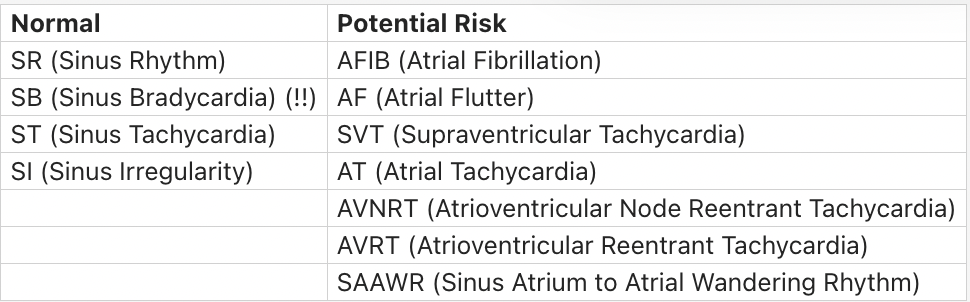

In [171]:
sorted(df_diagnostics['Rhythm'].unique())

['AF', 'AFIB', 'AT', 'AVNRT', 'AVRT', 'SA', 'SAAWR', 'SB', 'SR', 'ST', 'SVT']

In [172]:
# Display count the occurrences of each rhythm
rhythm_counts = df_diagnostics['Rhythm'].value_counts()
sorted_rhythm_counts = rhythm_counts.sort_index()
print(sorted_rhythm_counts)

Rhythm
AF        445
AFIB     1780
AT        121
AVNRT      16
AVRT        8
SA        399
SAAWR       7
SB       3889
SR       1826
ST       1568
SVT       587
Name: count, dtype: int64


#### Check for Missing Values

Methods:
- Feature/Sample Drop: Remove the whole rows or columns with missing values.
- Value Replacement: Estimate and replace the value using the mean, median, or mode.

In [173]:
# No need to deal with missing values
df_diagnostics.isnull().sum()

,0
FileName,0
Rhythm,0
Beat,0
PatientAge,0
Gender,0
VentricularRate,0
AtrialRate,0
QRSDuration,0
QTInterval,0
QTCorrected,0


##### Feature Drop (column)

Columns removed
* Beat: many beat labels which would create too many features (also not necessary to examine at this stage)
* FileName: not necessary to examine at this stage. <-- could add in eventually for increased complexity

In [174]:
# drop unnecessary columns
df_diagnostics = df_diagnostics.drop(columns=['Beat'])
df_diagnostics = df_diagnostics.drop(columns=['FileName'])

df_diagnostics.shape

(10646, 14)



#### Split using Scikit Learn

- Reference: [Scikit learn train test split](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html
)

In [175]:
from sklearn.model_selection import train_test_split
import numpy as np

# strips X and y values
X = df_diagnostics.values[:, 1:]  # All rows, all columns except the rhythm labels
y = df_diagnostics.values[:, 0].reshape((len(X),1))   # All rows, rhythm column

# split configuration
test_size = 0.2   # % saved for tests
random_seed = 0   # save the seed for reproducibility

# data split
X_train, X_test, y_train, y_test =\
  train_test_split(X, y,
                   random_state=random_seed,
                   test_size=test_size,
                   stratify=y) # NOTE: NEED TO STRATIFY Y OR NO????

# data split info
print('X_train shape:', X_train.shape)
print('X_test shape:', X_test.shape)
print('y_train shape:', y_train.shape)
print('y_test shape:', y_test.shape)

X_train shape: (8516, 13)
X_test shape: (2130, 13)
y_train shape: (8516, 1)
y_test shape: (2130, 1)


In [ ]:
# converting to Pandas dataframe format
df_y_train = pd.DataFrame(y_train)

# add column labels
df_y_train.columns = df_diagnostics.columns[:1]
df_y_train

,Rhythm
0,SB
1,SB
2,SR
3,SB
4,SB
...,...
8511,SB
8512,SB
8513,SB
8514,SB


In [ ]:
# converting to Pandas dataframe format
df_X_train = pd.DataFrame(X_train)

# add column labels
df_X_train.columns = df_diagnostics.columns[1:]
df_X_train

,PatientAge,Gender,VentricularRate,AtrialRate,QRSDuration,QTInterval,QTCorrected,RAxis,TAxis,QRSCount,QOnset,QOffset,TOffset
0,73,MALE,58,58,84,416,408,3,36,10,224,266,432
1,64,MALE,44,44,94,562,480,21,0,8,215,262,496
2,35,FEMALE,82,82,84,368,429,89,46,13,227,269,411
3,63,FEMALE,52,52,88,440,409,-29,7,9,213,257,433
4,69,MALE,58,58,112,406,398,78,57,10,220,276,423
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8511,48,FEMALE,57,57,78,414,402,50,36,9,220,259,427
8512,68,MALE,51,51,124,426,392,48,21,8,216,278,429
8513,77,MALE,57,57,102,492,478,-19,10,10,222,273,468
8514,49,FEMALE,54,54,104,484,458,59,45,9,219,271,461


## Data Preprocessing
1. Accounting for Categorical data (nominal/ordinal) with one-hot encoding
2. Checking for Missing Values (already done before partition)
  - Note: not sure if should do after partition or not
3. Data Normalization <-- NOTE: might perform (depends on model)

### For X_train & X_test Data
- With rhythm labels as y, only column to encode = Gender

In [ ]:
print(list(df_X_train.columns))
sorted(df_X_train['Gender'].unique())

['PatientAge', 'Gender', 'VentricularRate', 'AtrialRate', 'QRSDuration', 'QTInterval', 'QTCorrected', 'RAxis', 'TAxis', 'QRSCount', 'QOnset', 'QOffset', 'TOffset']


['FEMALE', 'MALE']

In [ ]:
# needed libraries
import pandas as pd
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

encoder = OneHotEncoder(categories='auto', drop='first')
transformer = ColumnTransformer([ ('onehot', encoder, [1]),
                               ('keep', 'passthrough', [0,2,3,4,5,6,7,8,9,10,11,12])])
X_train_transf = transformer.fit_transform(X_train).astype(float)
X_test_transf = transformer.transform(X_test).astype(float) # no fit


# updated labels with 'FEMALE' dropped and rest replaced
new_columns = ['Male'] + list(df_X_train.columns[:1]) + list(df_X_train.columns[2:])

df_X_train_transf = pd.DataFrame(X_train_transf)
df_X_train_transf.columns = new_columns
display(df_X_train_transf)

df_X_test_transf = pd.DataFrame(X_test_transf)
df_X_test_transf.columns = new_columns
display(df_X_test_transf)

,Male,PatientAge,VentricularRate,AtrialRate,QRSDuration,QTInterval,QTCorrected,RAxis,TAxis,QRSCount,QOnset,QOffset,TOffset
0,1.0,73.0,58.0,58.0,84.0,416.0,408.0,3.0,36.0,10.0,224.0,266.0,432.0
1,1.0,64.0,44.0,44.0,94.0,562.0,480.0,21.0,0.0,8.0,215.0,262.0,496.0
2,0.0,35.0,82.0,82.0,84.0,368.0,429.0,89.0,46.0,13.0,227.0,269.0,411.0
3,0.0,63.0,52.0,52.0,88.0,440.0,409.0,-29.0,7.0,9.0,213.0,257.0,433.0
4,1.0,69.0,58.0,58.0,112.0,406.0,398.0,78.0,57.0,10.0,220.0,276.0,423.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8511,0.0,48.0,57.0,57.0,78.0,414.0,402.0,50.0,36.0,9.0,220.0,259.0,427.0
8512,1.0,68.0,51.0,51.0,124.0,426.0,392.0,48.0,21.0,8.0,216.0,278.0,429.0
8513,1.0,77.0,57.0,57.0,102.0,492.0,478.0,-19.0,10.0,10.0,222.0,273.0,468.0
8514,0.0,49.0,54.0,54.0,104.0,484.0,458.0,59.0,45.0,9.0,219.0,271.0,461.0


,Male,PatientAge,VentricularRate,AtrialRate,QRSDuration,QTInterval,QTCorrected,RAxis,TAxis,QRSCount,QOnset,QOffset,TOffset
0,1.0,68.0,56.0,44.0,116.0,498.0,480.0,7.0,60.0,9.0,220.0,278.0,469.0
1,1.0,67.0,56.0,56.0,92.0,430.0,414.0,31.0,41.0,9.0,219.0,265.0,434.0
2,1.0,72.0,59.0,59.0,98.0,420.0,415.0,68.0,81.0,10.0,218.0,267.0,428.0
3,1.0,52.0,103.0,103.0,112.0,370.0,484.0,50.0,22.0,17.0,223.0,279.0,408.0
4,1.0,58.0,57.0,57.0,96.0,412.0,401.0,23.0,50.0,9.0,213.0,261.0,419.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2125,1.0,8.0,108.0,108.0,80.0,324.0,434.0,78.0,48.0,18.0,219.0,259.0,381.0
2126,1.0,60.0,59.0,59.0,80.0,390.0,386.0,35.0,57.0,9.0,218.0,258.0,413.0
2127,0.0,76.0,154.0,182.0,78.0,276.0,442.0,63.0,50.0,25.0,219.0,258.0,357.0
2128,0.0,75.0,104.0,96.0,78.0,336.0,441.0,44.0,-77.0,17.0,225.0,264.0,393.0


### For y_train & y_test Data
- With rhythm labels as y, 11 rhythm names to encode

In [ ]:
print(list(df_y_train.columns))
sorted(df_y_train['Rhythm'].unique())

['Rhythm']


['AF', 'AFIB', 'AT', 'AVNRT', 'AVRT', 'SA', 'SAAWR', 'SB', 'SR', 'ST', 'SVT']

In [ ]:
# Ensure y_train and y_test are in 2D format
y_train = y_train.reshape(-1, 1)
y_test = y_test.reshape(-1, 1)

In [ ]:
# sparse_output = false = new setting to be a dense matrix
# SLIGHTLY WORKING <<<
encoder = OneHotEncoder(categories='auto', drop='first', sparse_output=False)
transformer = ColumnTransformer([ ('onehot', encoder, [0])])
y_train_transf = transformer.fit_transform(y_train).astype(float)
y_test_transf = transformer.transform(y_test).astype(float) # no fit


new_y_columns = ['AFIB', 'AT', 'AVNRT', 'AVRT', 'SA', 'SAAWR', 'SB', 'SR', 'ST', 'SVT']
df_y_train_transf = pd.DataFrame(y_train_transf, columns = new_y_columns)
# note; might df_y_train_transf.toarray() <-- to convert to dense?
display(df_y_train_transf)

df_y_test_transf = pd.DataFrame(y_test_transf, columns = new_y_columns)
display(df_y_test_transf)

,AFIB,AT,AVNRT,AVRT,SA,SAAWR,SB,SR,ST,SVT
0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...
8511,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
8512,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
8513,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
8514,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


,AFIB,AT,AVNRT,AVRT,SA,SAAWR,SB,SR,ST,SVT
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...
2125,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2126,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2127,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2128,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
 # Check if it's a sparse matrix
if hasattr(df_y_train_transf, "toarray"):
    y_train_dense = y_train_transf.toarray()
else:
    y_train_dense = y_train_transf  # Already dense

# Compute sparsity
total_elements = y_train_dense.size
zero_elements = np.count_nonzero(y_train_dense == 0)
sparsity = zero_elements / total_elements  # Ratio of zeros

print(f"Sparsity Ratio: {sparsity:.2%}")

Sparsity Ratio: 90.42%


## Developing a Model
1. try logistic regression??